In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
from collections import defaultdict
from scipy.stats import shapiro, anderson
from matplotlib.ticker import StrMethodFormatter

In [2]:
# Read data
data_path = 'vacancy_data_analyst_python_10102020.csv'
# data_path = 'vacancy_data_ansys_06092020.csv'
data = pd.read_csv(data_path, index_col=0, converters={"Key Skills": literal_eval})
data.head(10)

,ID,Title,Wage,Key Skills,Employment,Timetable,Experience,Company_name,City,link
0,39062919,Senior Analyst,от 150000 до 250000 руб. на руки,"[Английский — C1 — Продвинутый, Python, Google...",Полная занятость,удаленная работа,более 6 лет,LATOKEN,Москва,https://hh.ru/vacancy/39062919
1,39416083,Data analyst / Продуктовый аналитик,от 180000 руб. на руки,"[SQL, Python, Data Analysis]",Полная занятость,полный день,1–3 года,Payment Systems,Москва,https://hh.ru/vacancy/39416083
2,39264988,Data Analyst / Специалист по работе с данными,от 100000 руб. до вычета налогов,"[Linux, Работа с большим объемом информации, S...",Полная занятость,удаленная работа,1–3 года,ООО Перфект Системс,Москва,https://hh.ru/vacancy/39264988
3,39629942,Аналитик данных / Data Analyst,з/п не указана,"[Python, SQL, MS Excel, Статистический анализ]",Полная занятость,полный день,1–3 года,Rambler Group,Москва,https://hh.ru/vacancy/39629942
4,39214143,Lead Product Analyst,от 250000 руб. на руки,"[Python, SQL, Статистический анализ, MS SQL, А...",Полная занятость,полный день,не требуется,ООО Таймпэд,Москва,https://hh.ru/vacancy/39214143
5,39663586,Python Developer/Analyst,от 80000 до 140000 руб. до вычета налогов,"[Английский — B2 — Средне-продвинутый, CRM, Da...",Полная занятость,удаленная работа,1–3 года,LATOKEN,Москва,https://hh.ru/vacancy/39663586
6,39659675,Analyst,от 80000 до 140000 руб. на руки,"[Английский — B2 — Средне-продвинутый, Python,...",Полная занятость,удаленная работа,3–6 лет,LATOKEN,Москва,https://hh.ru/vacancy/39659675
7,39638468,Lead Data Analyst,от 250000 руб. на руки,"[Python, SQL, MS SQL, Business Intelligence Sy...",Полная занятость,полный день,3–6 лет,Skyeng,Москва,https://hh.ru/vacancy/39638468
8,38576536,Data Analyst to Equity Research,з/п не указана,[],Полная занятость,полный день,не требуется,ВТБ Капитал,Москва,https://hh.ru/vacancy/38576536
9,39588104,Business/Data Analyst,з/п не указана,"[Английский — B2 — Средне-продвинутый, Python,...",Полная занятость,полный день,3–6 лет,ООО ПИК-Аренда,Москва,https://hh.ru/vacancy/39588104


In [3]:
# Data filtration by keywords
keywords = ['data', 'analyst', 'scientist', 'аналитик', 'machine', 'ml']
search_pattern = '|'.join(keywords)
print('key words: ', ', '.join(keywords))

filter = data['Title'].str.contains(search_pattern, case=False)
proper_vacancies = '{:.2%}'.format(sum(filter)/data['Title'].size)
print(sum(filter), '/', filter.size, '=', proper_vacancies)
data = data.loc[filter]
data.head()

key words:  data, analyst, scientist, аналитик, machine, ml
691 / 995 = 69.45%


,ID,Title,Wage,Key Skills,Employment,Timetable,Experience,Company_name,City,link
0,39062919,Senior Analyst,от 150000 до 250000 руб. на руки,"[Английский — C1 — Продвинутый, Python, Google...",Полная занятость,удаленная работа,более 6 лет,LATOKEN,Москва,https://hh.ru/vacancy/39062919
1,39416083,Data analyst / Продуктовый аналитик,от 180000 руб. на руки,"[SQL, Python, Data Analysis]",Полная занятость,полный день,1–3 года,Payment Systems,Москва,https://hh.ru/vacancy/39416083
2,39264988,Data Analyst / Специалист по работе с данными,от 100000 руб. до вычета налогов,"[Linux, Работа с большим объемом информации, S...",Полная занятость,удаленная работа,1–3 года,ООО Перфект Системс,Москва,https://hh.ru/vacancy/39264988
3,39629942,Аналитик данных / Data Analyst,з/п не указана,"[Python, SQL, MS Excel, Статистический анализ]",Полная занятость,полный день,1–3 года,Rambler Group,Москва,https://hh.ru/vacancy/39629942
4,39214143,Lead Product Analyst,от 250000 руб. на руки,"[Python, SQL, Статистический анализ, MS SQL, А...",Полная занятость,полный день,не требуется,ООО Таймпэд,Москва,https://hh.ru/vacancy/39214143


In [4]:
# skills frequency calculation
skills_freq = defaultdict(int)
for row in data['Key Skills']:
    for key in row:
        skills_freq[key] += 1
skills_freq_sorted = pd.Series(sorted(skills_freq.items(), key=lambda x: x[1], reverse=True))
skills_freq_sorted.head(20)

0                           (SQL, 397)
1                        (Python, 387)
2                         (MS SQL, 91)
3                  (Анализ данных, 74)
4                    (Data Mining, 72)
5     (Аналитические исследования, 55)
6                (Английский язык, 52)
7                  (MS PowerPoint, 51)
8      (Математическая статистика, 43)
9               (Google Analytics, 41)
10                 (Бизнес-анализ, 41)
11                    (PostgreSQL, 39)
12         (Статистический анализ, 38)
13                   (Базы данных, 38)
14        (Аналитическое мышление, 38)
15                           (VBA, 37)
16                      (MS Excel, 34)
17                         (Linux, 29)
18                           (Git, 29)
19                          (Java, 29)
dtype: object

In [5]:
# Wage filter
cond = ~(data.Wage == 'з/п не указана')
data_wage = data.loc[cond]

# get RUB
# from
data = data.assign(Wage_from = data['Wage'].str.extract('от (\d+)', expand=False).astype(float))
# to
data = data.assign(Wage_to = data['Wage'].str.extract('до (\d+)', expand=False).astype(float))

# get currency
curr_list = ['USD', 'EUR']
for curr in curr_list:
    # cuurency rate
    try:
        from forex_python.converter import CurrencyRates
        c = CurrencyRates()
        currency_rate = round(c.get_rate(curr, 'RUB'), 2)
    except:
        currency_rate = 100
    print(curr, '=', currency_rate, 'RUB')
    # get currency
    cond_currency = data.Wage.str.contains(curr, case=False, regex=False)
    print('Wage in', curr, sum(cond_currency))
    data.loc[cond_currency, ['Wage_from', 'Wage_to']] = data.loc[cond_currency, ['Wage_from', 'Wage_to']]*currency_rate

print('All:', data.Wage.size,
      'Specified:', data_wage.shape[0],
      'From:', sum(data.Wage_from.notnull()),
      'To:', sum(data.Wage_to.notnull())
     )

data.head()

USD = 77.1 RUB
Wage in USD 0
EUR = 90.94 RUB
Wage in EUR 1
All: 691 Specified: 88 From: 71 To: 54


,ID,Title,Wage,Key Skills,Employment,Timetable,Experience,Company_name,City,link,Wage_from,Wage_to
0,39062919,Senior Analyst,от 150000 до 250000 руб. на руки,"[Английский — C1 — Продвинутый, Python, Google...",Полная занятость,удаленная работа,более 6 лет,LATOKEN,Москва,https://hh.ru/vacancy/39062919,150000.0,250000.0
1,39416083,Data analyst / Продуктовый аналитик,от 180000 руб. на руки,"[SQL, Python, Data Analysis]",Полная занятость,полный день,1–3 года,Payment Systems,Москва,https://hh.ru/vacancy/39416083,180000.0,NaN
2,39264988,Data Analyst / Специалист по работе с данными,от 100000 руб. до вычета налогов,"[Linux, Работа с большим объемом информации, S...",Полная занятость,удаленная работа,1–3 года,ООО Перфект Системс,Москва,https://hh.ru/vacancy/39264988,100000.0,NaN
3,39629942,Аналитик данных / Data Analyst,з/п не указана,"[Python, SQL, MS Excel, Статистический анализ]",Полная занятость,полный день,1–3 года,Rambler Group,Москва,https://hh.ru/vacancy/39629942,NaN,NaN
4,39214143,Lead Product Analyst,от 250000 руб. на руки,"[Python, SQL, Статистический анализ, MS SQL, А...",Полная занятость,полный день,не требуется,ООО Таймпэд,Москва,https://hh.ru/vacancy/39214143,250000.0,NaN


In [6]:
#filter extreme values

data_plot = data[['Experience', 'Wage_from']]

print('Upper border wage:', round(data_plot.Wage_from.mean() + 5*data_plot.Wage_from.std()))

cond = data_plot.Wage_from <= (data_plot.Wage_from.mean() + 5*data_plot.Wage_from.std())

data_plot = data_plot.loc[cond]

plot_properties = {'color':'#C0C0C0',
                  'grid':False,
                  'histtype':'bar',
                  'rwidth':0.9,
                  'edgecolor':'black',
                  'linewidth':1.2}

ax = data_plot.hist(bins=int(data_plot.Wage_from.size/4), **plot_properties)[0][0];
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('');

Upper border wage: 404306


In [7]:
agg_data = data.groupby(['Experience'], as_index=False).agg({'ID': 'count',
                                                             'Wage_from': ['mean', 'median', 'count' ],
                                                             'Wage_to': ['mean', 'median', 'count' ]}).round()
agg_data.columns = ['_'.join(col).strip() for col in agg_data.columns.values]
agg_data.rename(columns={'Experience_':'Experience', 'ID_count':'Quantity'}, inplace=True)
agg_data.sort_values(by='Wage_from_mean', inplace=True)
agg_data.reset_index(drop=True, inplace=True)

agg_data.head()

,Experience,Quantity,Wage_from_mean,Wage_from_median,Wage_from_count,Wage_to_mean,Wage_to_median,Wage_to_count
0,не требуется,85,105625.0,90000.0,8,120000.0,125000.0,6
1,1–3 года,359,106806.0,100000.0,36,167200.0,160000.0,25
2,3–6 лет,233,136042.0,110000.0,24,193810.0,180000.0,21
3,более 6 лет,14,183367.0,150000.0,3,284145.0,284145.0,2


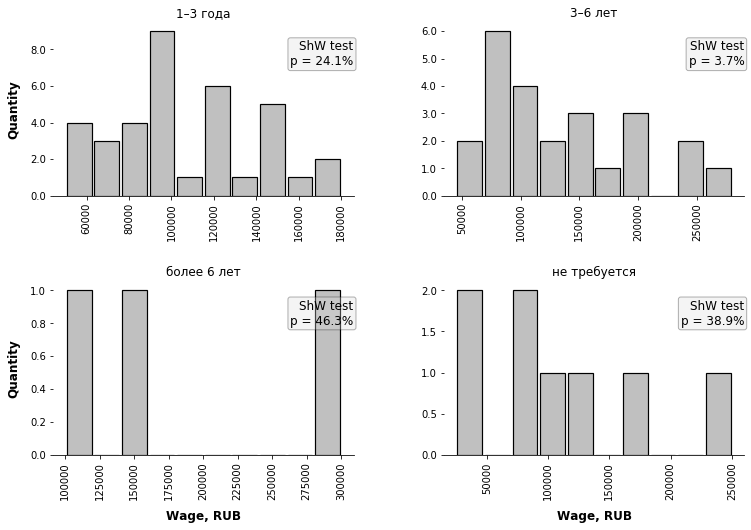

In [8]:
plot_properties = {'color':'#C0C0C0',
                  'grid':False,
                  'histtype':'bar',
                  'rwidth':0.9,
                  'edgecolor':'black',
                  'linewidth':1.2,
                  'figsize':(12,8),
                  'layout':(2,2)}


# cond_exp = data.Experience.str.contains(experience_key, case=False)
cond_not_empty_wage = pd.notna(data.Wage_from)
wage = data.loc[cond_not_empty_wage][['Experience', "Wage_from"]]
ax = wage.hist(by='Experience', **plot_properties);

for row_num, row_ax in enumerate(ax):
    for col_num, x in enumerate(row_ax):
        title = x.get_title()
        wage_agg = wage.loc[wage.Experience == x.get_title()].Wage_from    
    
#         https://mode.com/example-gallery/python_histogram/

#         Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)
    
#         Set axis labels
        if row_num == 1:
            x.set_xlabel("Wage, RUB", labelpad=10, weight='bold', size=12)
        if col_num == 0:
            x.set_ylabel("Quantity", labelpad=10, weight='bold', size=12)
    
#         Format y-axis label
        x.yaxis.set_major_formatter(StrMethodFormatter('{x:0.1f}'))
        x.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
                
#         Text box
        try:
            textstr = 'ShW test\np = {:2.1%}'.format(shapiro(wage_agg)[-1])
        except:
            textstr = 'N/A'
        
        props = dict(boxstyle='Round, pad=0.2', facecolor='gainsboro', alpha=0.3)
        x.text(1.0, 0.90, textstr, transform=x.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='right', bbox=props)